<a href="https://www.kaggle.com/code/parisrohan/rp-pima-diabetes-1?scriptVersionId=91861304" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


### Load required libraries and data

In [2]:
#Load required libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Laod the dataset
df_data=pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
df_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Feature Description:
* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

## EDA

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df_data.shape

(768, 9)

### Distribution of data

Text(0.5, 0, 'Outcome')

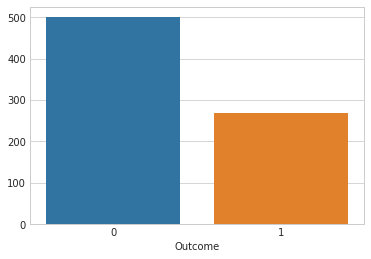

In [6]:
#distribution of values in target feature
sns.barplot(x=df_data['Outcome'].value_counts().index, y=df_data['Outcome'].value_counts().values, data=df_data)
plt.xlabel('Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

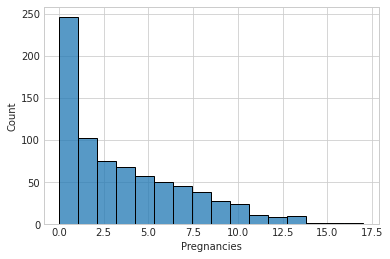

In [7]:
sns.histplot(data=df_data, x='Pregnancies')

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

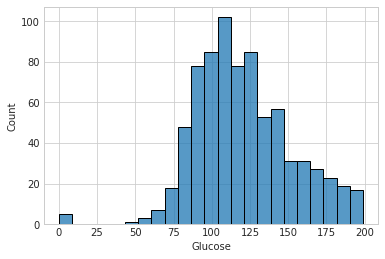

In [8]:
sns.histplot(data=df_data, x='Glucose')

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

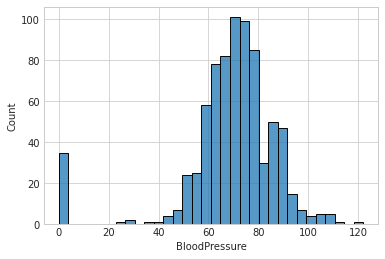

In [9]:
sns.histplot(data=df_data, x='BloodPressure')

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

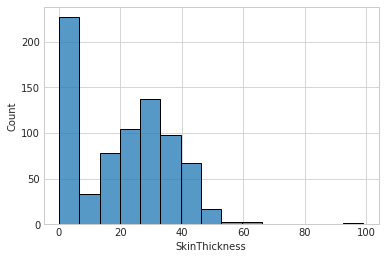

In [10]:
sns.histplot(data=df_data, x='SkinThickness')

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

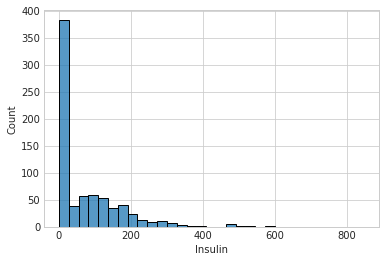

In [11]:
sns.histplot(data=df_data, x='Insulin')

<AxesSubplot:xlabel='BMI', ylabel='Count'>

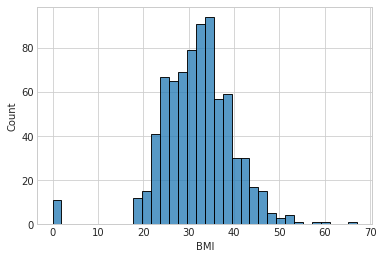

In [12]:
sns.histplot(data=df_data, x='BMI')

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Count'>

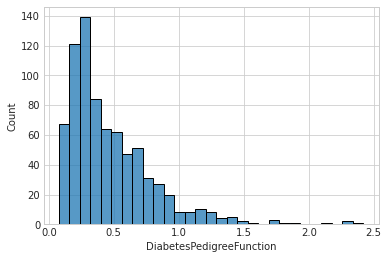

In [13]:
sns.histplot(data=df_data, x='DiabetesPedigreeFunction')

<AxesSubplot:xlabel='Age', ylabel='Count'>

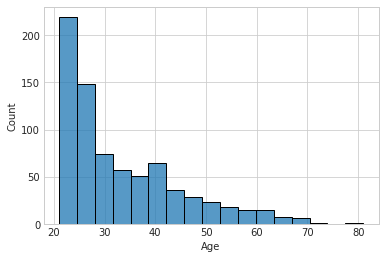

In [14]:
sns.histplot(data=df_data, x='Age')

Observation:
* There are no categorical features
* Features like Pregnancies, SkinThickness, Insulin, DiabetesPedigreeFunction and Age are right-skewed
* There are few outliers

### Check for missing data

In [15]:
#Functon to get count of missing values in each column
def get_cols_with_missing_values(DataFrame):
    missing_na_columns=(DataFrame.isnull().sum())
    return missing_na_columns[missing_na_columns > 0]

In [16]:
print(get_cols_with_missing_values(df_data))

Series([], dtype: int64)


Observation: The given dataset has **no missing values**

In [17]:
df_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
df_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Feature Transformation

## Feature Scaling